#1. Code tham khảo về pmf, cdf

Số câu của bài thi trắc nghiệm cuối kỳ môn toán của sinh viên Bách khoa Hà Nội được cho biến ngẫu nhiên có phân phối nhị thức. Giả sử một số sinh viên không học bài thì gọi $X$ là số câu mà sinh viên trả lời được.  

$X\sim B(n=40; p=0.25)$

a) Tìm xác suất $P(X=25)$

b)Tìm xác suất để $P(X<=12)$

d) Tìm xác suất $P( 25<X<35)$

c) Tìm kỳ vọng và phương sai của X

#2. PMF, CDF, PDF
##2.1. Hàm khối lượng xác suất (Probability Mass Function - PMF)
###2.1.1. Đối với biến rời rạc
Là một trong hai lớp phân phối xác suất phổ biến nhất. Các giá trị của một biến ngẫu nhiên rời rạc là hữu hạn đếm được.
Nếu ${X}$ là một biến ngẫu nhiên, thì tồn tại duy nhất các hàm không âm $f(x)$ và $F(x)$, sao cho điều dưới đây đúng:

\begin{align*}
&P(X=x) = f(x)\\
&P(X < x) = F(x)
\end{align*}

###2.1.2. Đối với biến liên tục
Một biến ngẫu nhiên liên tục nhận các giá trị không đếm được.
Nếu ${X}$ là một biến ngẫu nhiên liên tục, khi đó tồn tại duy nhất hàm không âm, $f(x)$ và $F(x)$, sao cho điều dưới đây đúng:
\begin{align*}
P(a\leq X\leq b) &=\int^b_a f(x) dx
\\P(X < x) &= F(x)
\end{align*}

In [2]:
from scipy.stats import binom # Gọi thư viện có gói nhị thức

# Số lượng mẫu là 40
n = 40

# Xác suất để lựa chọn đúng là 0.25
p = 0.25

# Khai báo biến X có phân phối nhị thức
X = binom(n,p)

In [3]:
# P(X=25)=p_X(25)=X.pmf(25)
X.pmf(25)

4.774401587646182e-07

###2.2. Hàm tích lũy xác suất (Cumulative Distribution Function)

In [4]:
# P(X<=12)=F_X(12)=X.cdf(12)
X.cdf(12)

0.8208657576539586

In [5]:
# P(25<X<35)=P(X<=34)-P(X<=25)=F_X(34)-F_X(25)=X.cdf(34)-X.cdf(25)
X.cdf(34)-X.cdf(25)

1.1052577697512334e-07

#3. Kỳ vọng và phương sai


In [6]:
#Kỳ vọng
X.mean()

10.0

In [7]:
#Phương sai
X.var()

7.5

# 4. Bài tập tham khảo về pdf và cdf
Điểm của sinh viên Bách khoa Hà Nội giả sử là biến ngẫu nhiên $Y$ tuân theo luật phân phối chuẩn $Y\sim N(\mu=6, \sigma^2=2.5^2)$

a) Tìm xác suất $P(X > 4)$

b) Tìm xác suất $P(4<X<8.5)$

c) Tìm xác suất có điều kiện $P(X<0.85|X>4)$

d) Tạo ra một chuỗi $n=100$ giá trị nhiễu có phân phối chuẩn với kỳ vọng 0 và phương sai $2.5^2$

In [9]:
from scipy.stats import norm

# Các tham số của phân phối chuẩn
mu = 6
sigma = 2.5

# Biến ngẫu nhiên Y tuân theo quy luật phân phối chuẩn
Y = norm(mu, sigma)

# P(X > 4) = 1 - P(X <= 4)
1 - Y.cdf(4)

0.7881446014166034

In [10]:
# P(4 < X < 8.5)

Y.cdf(8.5) - Y.cdf(4)


0.6294893474851462

In [ ]:
# Tìm xác suất có điều kiện $P(X < 0.85|X > 4)$

(Y.cdf(8.5) - Y.cdf(4))/(1 - Y.cdf(4))

In [15]:
# Tạo ra chuỗi thời gian

import numpy as np
import pandas as pd

# Chọn seed
np.random.seed(0)

# Độ dài chuỗi
n = 100

# Các tham số cho phân phối chuẩn
mu1 = 0  # Mean
sigma1 = sigma # Độ lệch chuẩn

# Biến ngẫu nhiên Z là biến ngẫu nhiên tuân theo quy luật phân phối chuẩn
Z = norm(mu1, sigma1)

# Khởi tạo các giá trị của biến ngẫu nhiên độc lập phân phối chuẩn
random_values = Z.rvs(size=n)

# Create a time index (e.g., daily time series)
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='D')

# Create a DataFrame with the simulated time series
df = pd.DataFrame({'Date': date_rng, 'Value': random_values})

# Print the first few rows of the DataFrame
print(df.head())

        Date     Value
0 2023-01-01  4.410131
1 2023-01-02  1.000393
2 2023-01-03  2.446845
3 2023-01-04  5.602233
4 2023-01-05  4.668895


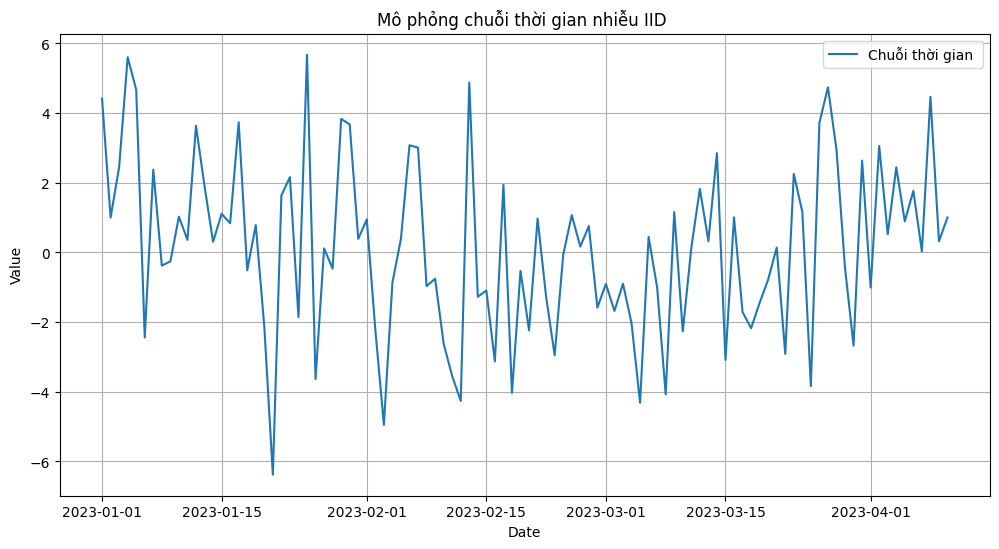

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Chuỗi thời gian ')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mô phỏng chuỗi thời gian nhiễu IID ' )
plt.legend()
plt.grid(True)
plt.show()

#5. Biến ngẫu nhiên hai chiều

Tại một trạm xăng, xăng được lưu trữ trong bể chứa theo tuần. Gọi $X$ là biến ngẫu nhiên biểu diễn cho tỷ lệ dung tích được lưu trữ trong tuần. Gọi $Y$ là tỷ lệ của dung tích bể bán được trong cùng một tuần. Chúng ta biết rằng trạm xăng không thể bán được số xăng nhiều hơn những gì được tích trữ trong tuần nên có nghĩa là $Y < X$. Hàm mật độ đồng thời của biến ngẫu nhiên $(X,Y)$ là:



$f_{X,Y}(x,y)=\begin{cases}{3x}, 0 \leq y\leq x \leq 1\\
0; \text{trái lại};
\end{cases}$


a) Tìm  $P(X\leq 1/2| Y\leq 0.03)$.

b) Tìm $P(Y < 0.3X|Y > 0.1X)$.



Xác suất cần tính ở ý a: $$ P(a)= \frac{\int_0^{0.03}\int_0^x 3x\,dy\,dx + \int_{0.03}^{0.5}\int_0^{0.03} 3x\,dy\,dx}{\int_0^{0.03}\int_0^x 3x\,dy\,dx + \int_{0.03}^1\int_0^{0.03} 3x\,dy\,dx}$$

Câu lệnh $\texttt{scipy.integrate.dblquad(func, a, b, gfun, hfun)}$ được sử dụng để tích phân kép của một hàm số hai biến trên một miền hai chiều được xác định bởi các giới hạn:

\begin{itemize}

\item $\texttt{func}$: Đây là hàm số hai biến cần tính tích phân.

\item $\texttt{a}$ và $\texttt{b}$: Đây là giới hạn của tích phân theo biến $x$.

\item $\texttt{gfun}$ và $\texttt{hfun}$: Đây là hai hàm số (hoặc lambda functions) được sử dụng để xác định giới hạn của tích phân theo biến $y$. Các hàm này xác định miền tích phân theo biến $y$ tại mỗi giá trị $x$.

\end{itemize}



In [19]:
import scipy.integrate
prob_D1 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 0.03, lambda x: 0, lambda x: x)[0]
prob_D2 = scipy.integrate.dblquad(lambda y, x: 3*x, 0.03, 0.5, lambda x: 0, lambda x: 0.03)[0]
prob_D3 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 0.03, lambda x: 0, lambda x: x)[0]
prob_D4 = scipy.integrate.dblquad(lambda y, x: 3*x, 0.03, 1, lambda x: 0, lambda x: 0.03)[0]
prob_D = (prob_D1 + prob_D2)/(prob_D3 + prob_D4)

print("Xác suất cần tìm:", prob_D)

Xác suất cần tìm: 0.24977493247974392


Xác suất ở ý b: $$P(b) = \frac{\int_0^1\int_{0.1x}^{0.3x} 3x\,dy\,dx}{\int_0^1\int_{0.1x}^x 3x\,dy\,dx}$$

In [16]:
#b)
import scipy.integrate
prob_D1 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 1, lambda x: 0.1*x, lambda x: 0.3*x)[0]
prob_D2 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 1, lambda x: 0.1*x, lambda x: x)[0]
prob_D = prob_D1/prob_D2

print("Xác suất cần tìm:", prob_D)

Xác suất cần tìm: 0.2222222222222222


#Bài tập thực hành

# Bài 1:


Thu nhập của một người lao động của một nước  là biến ngẫu nhiên $X$ có phân phối chuẩn $Norm(\mu= 9,\sigma=10)$. Chọn ngẫu nhiên một người lao động

1.1. Tìm xác suất thu nhập của người lao động được chọn cao hơn gấp đôi mức lương trung bình.

1.2. Tìm ngưỡng $c$ là ngưỡng mức lương thu nhập  cao sao cho  $P(X < c)=0.2$.

Ghi chú: Biết rằng phân phối chuẩn tắc $$\Phi(x)=P(X < x)=\int_{-\infty}^{x}\frac{e^{-t^2/2}}{\sqrt{2.\pi}}dt$$

In [23]:
# Bài 1.1.
from scipy.stats import norm

# Các tham số của phân phối chuẩn
mu = 9 # Trung bình
sigma = 19 # Độ lệch chuẩn

# Khởi tạo biến ngẫu nhiên tuân theo quy luật này
X = norm(mu, sigma)

# Xác suất thu nhập của người lao động được chọn cao gấp đôi lương trung bình
p = 0.2
c = norm.ppf(p)

print(f"Ngưỡng c cần tìm là: {-c}")

Ngưỡng c cần tìm là: 0.8416212335729142


# Bài 2:
Tại một trạm xăng, xăng được lưu trữ trong bể chứa theo tuần. Gọi $X$ là biến ngẫu nhiên biểu diễn cho tỷ lệ dung tích được lưu trữ trong tuần. Gọi $Y$ là tỷ lệ của dung tích bể bán được trong cùng một tuần. Chúng ta biết rằng trạm xăng không thể bán được số xăng nhiều hơn những gì được tích trữ trong tuần nên có nghĩa là $Y < X$. Hàm mật độ đồng thời của biến ngẫu nhiên $(X,Y)$ là:



$$f_{X,Y}(x,y)=\begin{cases}{3x}, 0 \leq y\leq x \leq 1\\
0; \text{trái lại};
\end{cases}$$


a) Tìm  $P(X\leq 1/2, Y\leq 1/4)$.

b) Tìm $P(Y < 0.4X)$.

In [29]:
# a)
def f(y, x):
    if 0 <= y <= x <= 1:
        return 3*x
    else:
        return 0

prob = scipy.integrate.dblquad(f, 0, 0.5, 0, 0.25)[0]

print("P(X <= 0.5, Y <= 0.25) =", prob)

P(X <= 0.5, Y <= 0.25) = 0.08593775044825694


In [27]:
# b)

def f(y, x):
    if 0 <= y <= x <= 1:
        return 3*x
    else:
        return 0

prob = scipy.integrate.dblquad(f, 0, 1, 0, min(0.4*x, 1))[0]
print("P(Y < 0.4X) =", prob)

P(Y < 0.4X) = 0.4


# Bài 3:

Tạo ra một chuỗi $n=100$ giá trị nhiễu có phân phối đều trong khoảng $[-3,3]$


In [30]:
import numpy as np
import pandas as pd

# Chọn seed
np.random.seed(0)

# Độ dài chuỗi
n = 100

# Tạo ra các giá trị ngẫu nhiên phân phối đều
random_values = np.random.uniform(-3, 3, size=n)

# Tạo chỉ mục thời gian
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='D')

# Tạo DataFrame
df = pd.DataFrame({'Date': date_rng, 'Value': random_values})

# In 5 dòng đầu
print(df.head())

        Date     Value
0 2023-01-01  0.292881
1 2023-01-02  1.291136
2 2023-01-03  0.616580
3 2023-01-04  0.269299
4 2023-01-05 -0.458071


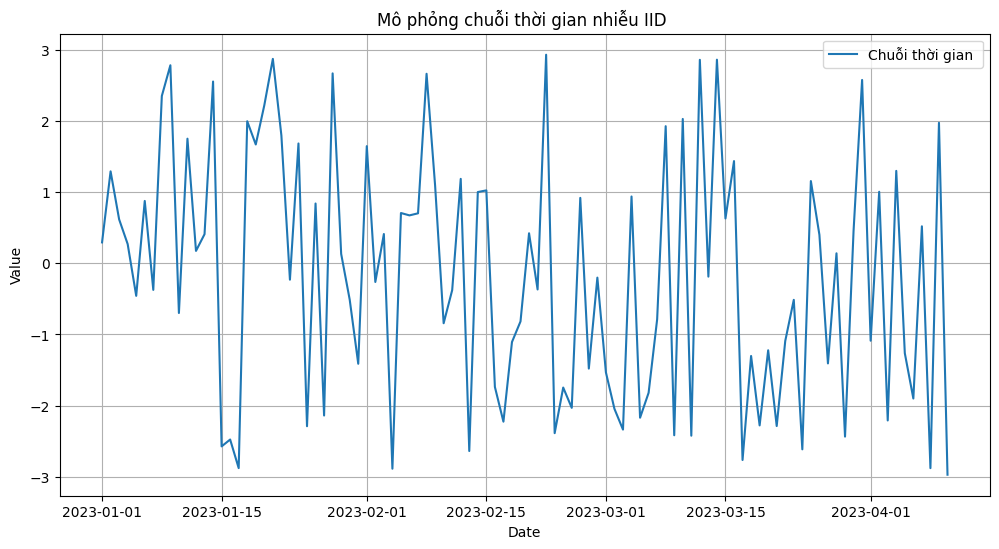

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Chuỗi thời gian ')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mô phỏng chuỗi thời gian nhiễu IID ' )
plt.legend()
plt.grid(True)
plt.show()